In [15]:

from sklearn.svm import SVC
from PIL import Image, ImageDraw, \
    ImageFont
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# features and label generation
f_size = 33

X = []
y = []

for digit in range(10):
    image = Image.new('L', (20, 20),color=0)
    draw = ImageDraw.Draw(image)
    draw.text((7, 4), str(digit), fill=255)
    array_image = np.array(image)
    array_image = np.unique(array_image)
    array_image = np.pad(array_image, (0, f_size - len(array_image)), 'constant', constant_values=0)

    X.append (array_image)
    y.append (digit)
    print(f"Image of {digit}", end="")
    display(image)

# pandas print
pd.set_option('display.expand_frame_repr', False)
df = pd.DataFrame(X)
print("\nDataframe:")
print(df)
print("\nLabels:")
print(y)



Image of 0

Image of 1

Image of 2

Image of 3

Image of 4

Image of 5

Image of 6

Image of 7

Image of 8

Image of 9


Dataframe:
   0   1   2    3    4    5    6    7    8    9   ...   23   24   25   26   27   28   29   30   31   32
0   0   2  15   26   27  114  115  136  137  138  ...    0    0    0    0    0    0    0    0    0    0
1   0  16  24  109  160  195  240  241    0    0  ...    0    0    0    0    0    0    0    0    0    0
2   0   1   2   11   12   21   35   40   55   70  ...  212  215  234  244    0    0    0    0    0    0
3   0   3   4    6   10   17   25   30   40   61  ...  192  193  198  205  219  224  237  245    0    0
4   0   7  13   26   60   74   86   90  149  162  ...    0    0    0    0    0    0    0    0    0    0
5   0   3  32   35   37   58   69   79   82   93  ...  222  235    0    0    0    0    0    0    0    0
6   0   2   3    6   22   32   34   35   36   65  ...  189  191  192  194  197  199  218  235  241    0
7   0   1  22   36   39   55   62   78  100  130  ...    0    0    0    0    0    0    0    0    0    0
8   0   2   3   33   35   47   48   52   53   54  ..


Dataframe:
   0   1   2    3    4    5    6    7    8    9   ...   23   24   25   26   27   28   29   30   31   32
0   0   2  15   26   27  114  115  136  137  138  ...    0    0    0    0    0    0    0    0    0    0
1   0  16  24  109  160  195  240  241    0    0  ...    0    0    0    0    0    0    0    0    0    0
2   0   1   2   11   12   21   35   40   55   70  ...  212  215  234  244    0    0    0    0    0    0
3   0   3   4    6   10   17   25   30   40   61  ...  192  193  198  205  219  224  237  245    0    0
4   0   7  13   26   60   74   86   90  149  162  ...    0    0    0    0    0    0    0    0    0    0
5   0   3  32   35   37   58   69   79   82   93  ...  222  235    0    0    0    0    0    0    0    0
6   0   2   3    6   22   32   34   35   36   65  ...  189  191  192  194  197  199  218  235  241    0
7   0   1  22   36   39   55   62   78  100  130  ...    0    0    0    0    0    0    0    0    0    0
8   0   2   3   33   35   47   48   52   53   54  ..

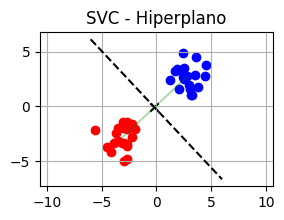

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Crear from sklearn.svm import SVCdos grupos de datos dispersos (claramente separables)
np.random.seed(42)
X1 = np.random.randn(20, 2) + [3, 3]
X2 = np.random.randn(20, 2) + [-3, -3]

# Graficar los datos
plt.figure(figsize=(3, 2))
plt.scatter(X1[:, 0], X1[:, 1], color='blue', label='Clase 0')
plt.scatter(X2[:, 0], X2[:, 1], color='red', label='Clase 1')

# Calcular los centroides de cada clase
centroid_1 = X1.mean(axis=0)
centroid_2 = X2.mean(axis=0)

# Vector entre centroides
w = centroid_1 - centroid_2

# Punto medio (centro entre ambos centroides) — será el centro del hiperplano
midpoint = (centroid_1 + centroid_2) / 2

# Pendiente de la línea perpendicular al vector w (hiperplano)
slope = -w[0] / w[1]
intercept = midpoint[1] - slope * midpoint[0]

# Crear valores para la línea del hiperplano
x_vals = np.linspace(-6, 6, 100)
y_vals = slope * x_vals + intercept

# Dibujar el hiperplano
plt.plot(x_vals, y_vals, 'k--')

# Mostrar centroides y línea entre ellos (opcional, para visualización)
plt.plot([centroid_1[0], centroid_2[0]],
         [centroid_1[1], centroid_2[1]],
         'g-', alpha=0.3)

plt.scatter(*midpoint, color='black', marker='x')

# Estética del gráfico

plt.title("SVC - Hiperplano")
plt.axis('equal')
plt.grid(True)
# pandas print
pd.set_option('display.expand_frame_repr', False)
df = pd.DataFrame(X)
print("\nDataframe:")
print(df)
print("\nLabels:")
print(y)

plt.show()


In [20]:
from sklearn.svm import SVC

# model training
model = SVC()
model.fit(X, y)

# prediction
new_image = Image.new('L', (20, 20),color=0)
draw = ImageDraw.Draw(new_image)
draw.text((0, 0), "8", fill=255)

display(new_image)

test = np.array(new_image)
test = np.unique(test)
test = np.pad(test, (0, f_size - len(test)), 'constant', constant_values=0)
test = test.reshape(1, -1)

y_pred = model.predict(test)
print(f"Prediction: {y_pred}")


Prediction: [8]
